# OpenCV fundamentals

This notebook covers opening files, looking at pixels, and some simple image processing techniques.


In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_PATH_BSE = "/content/drive/MyDrive/geohackathon/Images/BSE/Image15_40.tif"
IMAGE_PATH_CL = "/content/drive/MyDrive/geohackathon/Images/CL/Image15_40.tif"

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

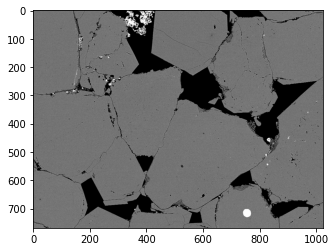

In [ ]:
input_image = cv2.imread(IMAGE_PATH_BSE)
plt.imshow(input_image)

In [ ]:
print(input_image.shape)

(768, 1024, 3)


In [ ]:
print(input_image.dtype)

uint8


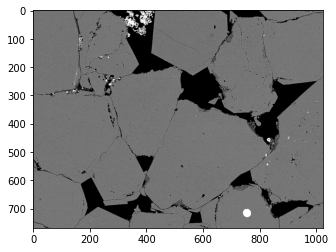

In [ ]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(b, cmap='gray')


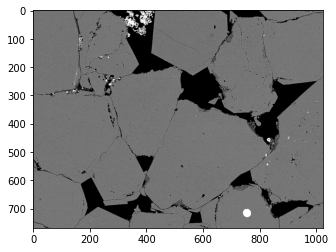

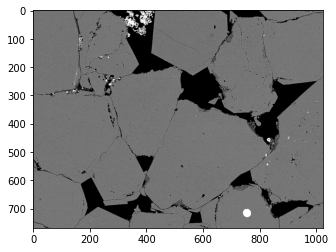

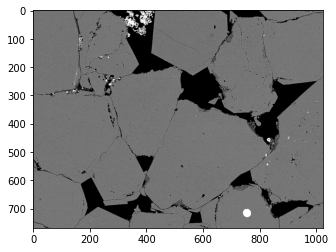

In [ ]:
plt.imshow(b, cmap='gray')
plt.show()
plt.imshow(g, cmap='gray')
plt.show()
plt.imshow(r, cmap='gray')
plt.show()

In [ ]:
input_image = cv2.imread("/content/drive/MyDrive/geohackathon/test_image.jpg")

In [ ]:
input_image.shape

(668, 1000, 3)

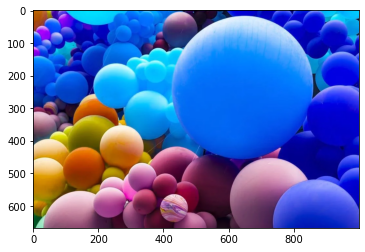

In [ ]:
plt.imshow(input_image)

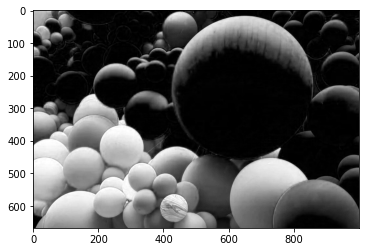

In [ ]:
# split channels
b,g,r=cv2.split(input_image)

# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(b, cmap='gray')


## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

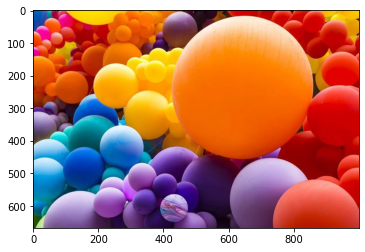

In [ ]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)


OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. [http://docs.opencv.org/trunk/de/d25/imgproc_color_conversions.html] has more information on how these colour conversions are done. 

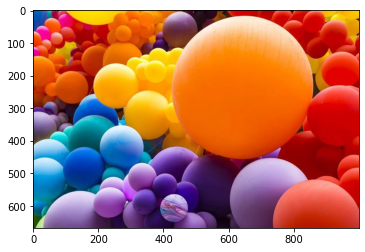

In [ ]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_merged)


## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [ ]:
pixel = input_image[100,600]
print(pixel)

[ 61 162 255]


In [ ]:
input_image[100,600] = [0,0,0]
pixelnew = input_image[100,600]
print(pixelnew)

[0 0 0]


## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

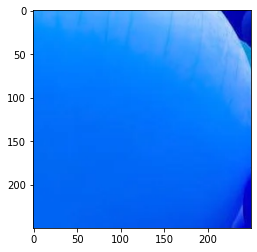

In [ ]:
dogface = input_image[100:350, 600:850]
plt.imshow(dogface)

250
250


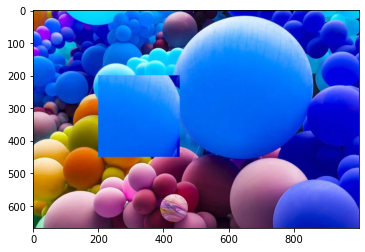

In [ ]:
fresh_image=cv2.imread('/content/drive/MyDrive/geohackathon/test_image.jpg')  
fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)